In [1]:
from unet.data_functions import *
from unet.model import *

Using TensorFlow backend.


In [2]:
train_path = r'D:\Clarifruit\cherry_stem\data\unet_data\train'
test_path = r'D:\Clarifruit\cherry_stem\data\unet_data\test'
test_aug_path = os.path.join(test_path, 'aug')

target_size = (256,256)
modes_dict = {'grayscale': 1, 'rgb': 3}

color_mode = 'rgb'

x_folder_name = 'image'
y_folder_name = 'label'

x_prefix = 'image'
y_prefix = 'label'

weights_file_name = 'unet_cherry_stem.hdfs5'
input_size = (*target_size, modes_dict[color_mode])

data_gen_args = dict(rescale=1./255,
                     rotation_range=0.5,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     shear_range=0.05,
                     zoom_range=0.05,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='nearest')

In [3]:

train_generator, val_generator = clarifruit_train_val_generators(batch_size=10,
                                       src_path=train_path,
                                       image_folder=x_folder_name,
                                       mask_folder=y_folder_name,
                                       aug_dict=data_gen_args,
                                       image_color_mode=color_mode,
                                       mask_color_mode='grayscale',
                                       image_save_prefix=x_prefix,
                                       mask_save_prefix=y_prefix,
                                       save_to_dir=None,
                                       target_size=target_size,
                                       seed=1)

Found 107 images belonging to 1 classes.
Found 26 images belonging to 1 classes.
Found 107 images belonging to 1 classes.
Found 26 images belonging to 1 classes.


In [4]:
model = unet(input_size=input_size,pretrained_weights=weights_file_name)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
epochs=20
steps_per_epoch = 2000
validation_steps = 100

In [8]:
early_stoping = EarlyStopping(monitor='val_loss',verbose=1, patience=3)
model_checkpoint = ModelCheckpoint(weights_file_name, monitor='loss', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001,
                              cooldown=1,verbose=1)
callbacks = [early_stoping, model_checkpoint,reduce_lr]

In [9]:
model.fit_generator(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = val_generator, 
    validation_steps = validation_steps,
    epochs = epochs,
    callbacks=callbacks)

Epoch 1/20
2000/2000 [==============================] - 1875s 937ms/step - loss: 0.0212 - acc: 0.9341 - val_loss: 0.0619 - val_acc: 0.9230

Epoch 00001: loss improved from inf to 0.02125, saving model to unet_cherry_stem.hdfs5
Epoch 2/20
2000/2000 [==============================] - 1865s 933ms/step - loss: 0.0197 - acc: 0.9341 - val_loss: 0.0512 - val_acc: 0.9237

Epoch 00002: loss improved from 0.02125 to 0.01969, saving model to unet_cherry_stem.hdfs5
Epoch 3/20
2000/2000 [==============================] - 1866s 933ms/step - loss: 0.0191 - acc: 0.9340 - val_loss: 0.0544 - val_acc: 0.9235

Epoch 00003: loss improved from 0.01969 to 0.01911, saving model to unet_cherry_stem.hdfs5
Epoch 4/20
2000/2000 [==============================] - 1870s 935ms/step - loss: 0.0187 - acc: 0.9340 - val_loss: 0.0560 - val_acc: 0.9235

Epoch 00004: loss improved from 0.01911 to 0.01869, saving model to unet_cherry_stem.hdfs5

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05

In [6]:
orig_path = r'D:\Clarifruit\cherry_stem\data\unet_data\orig\image'
test_path_image = os.path.join(test_path,x_folder_name)

pred_path = os.path.join(test_path,'pred')

In [7]:
prediction(model, orig_path, pred_path, target_size,threshold=0.5,as_gray=False)

d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\38359-00396.png_raw_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\38359-00396.png_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\38359-29555.png_raw_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\38359-29555.png_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry

d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\72169-56324.png_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\72170-94964.png_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\72173-26588.png_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\72175-84053.png_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry_venv\li

d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\78855-08594.png_raw_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\78855-08594.png_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\78882-03215.png_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry_venv\lib\site-packages\skimage\io\_io.py:141: UserWarning: D:\Clarifruit\cherry_stem\data\unet_data\test\pred\78882-50151.png_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
d:\clarifruit\cherry_stem\cherry_ven

In [8]:
image_name = '74714-32897.png'

orig_path = r'D:\Clarifruit\cherry_stem\data\unet_data\orig'
orig_image_path = os.path.join(orig_path,x_folder_name)
orig_mask_path = os.path.join(orig_path,y_folder_name)

test_image_path = os.path.join(test_path,x_folder_name)
test_mask_path = os.path.join(test_path,y_folder_name)

test_img, ground_truth_mask, test_mask_raw, test_mask_binary = get_images(image_name,
                                                                          pred_path,
                                                                          orig_image_path,
                                                                          orig_mask_path,
                                                                          target_size)

Results for image :74714-32897.png


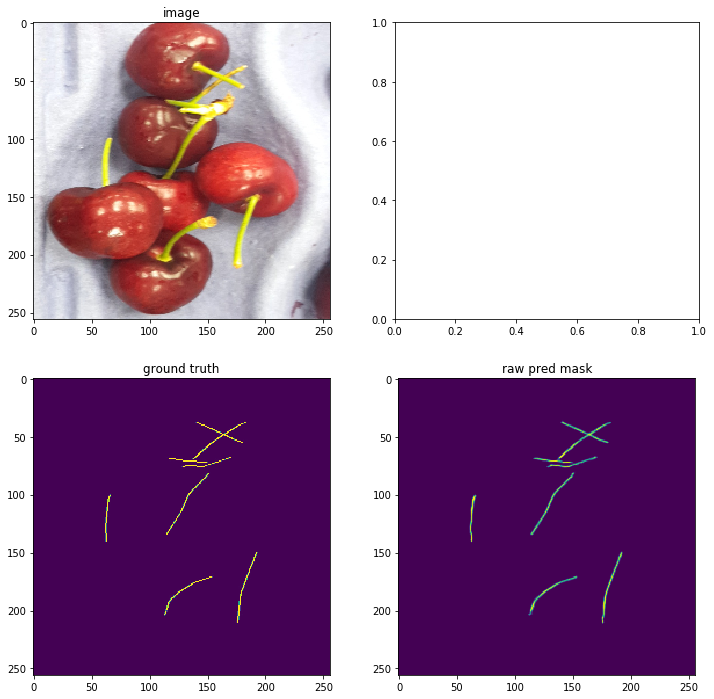

In [9]:
list1 = [image_name]
plot_from_list(list1,pred_path,orig_image_path,orig_mask_path,target_size)

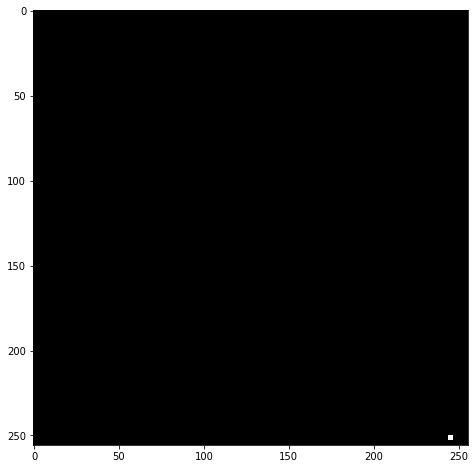

In [83]:
kernel1 = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(test_mask, cv2.MORPH_OPEN, kernel1)
plt.figure(figsize=(8,8))
plt.imshow(opening,cmap='gray')

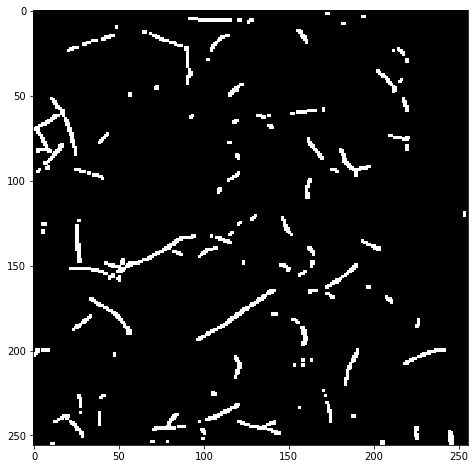

In [21]:
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(test_mask,kernel,iterations = 1)
plt.figure(figsize=(8,8))
plt.imshow(dilation,cmap='gray')


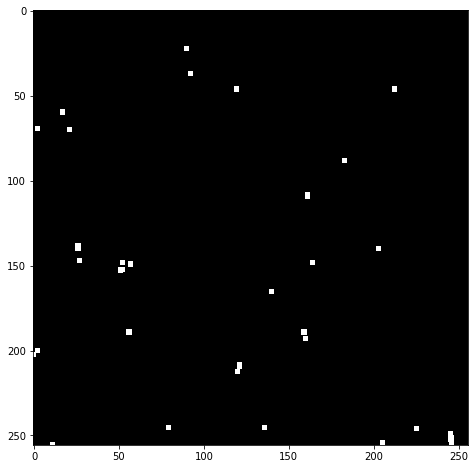

In [22]:
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel1)
plt.figure(figsize=(8,8))
plt.imshow(opening,cmap='gray')

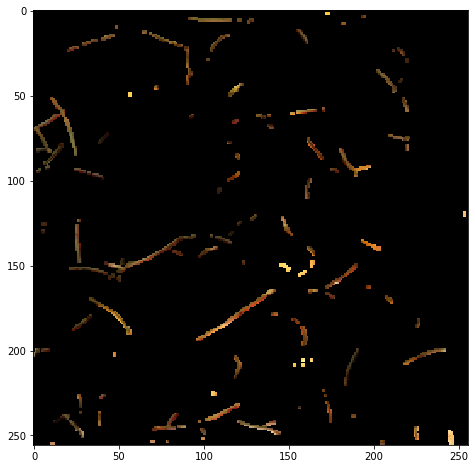

In [23]:
src1_mask=cv2.cvtColor(dilation,cv2.COLOR_GRAY2BGR)#change mask to a 3 channel image 
mask_out=cv2.subtract(src1_mask,test_img)
mask_out=cv2.subtract(src1_mask,mask_out)

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(mask_out, cv2.COLOR_BGR2RGB))